In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
cor = pd.read_csv('data/cortrialsrefreshMismatcheyetimeseries.csv')

In [16]:
new_cor=pd.DataFrame()
new_cor['time'] = cor['time']
new_cor['loc2diff'] = cor['loc2start'] - cor['loc3start']
new_cor['loc1diff'] = cor['loc1start'] - cor['loc3start']
new_cor['sub'] = cor['sub']
new_cor['time'] = cor['time']
cor = new_cor

In [17]:
new_cor.fillna(value=0, inplace=True)
time = new_cor['time']

In [18]:
sample = pd.DataFrame()
tmp_diff = pd.DataFrame()
sample = cor.sample(frac=1)
# tmp_diff = sample['loc2start'] - .25
# tmp_diff.fillna(value=0, inplace=True)


In [19]:
cordf_anova = pd.melt(cor, id_vars=['time', 'sub'], value_vars=['loc1start', 'loc2start', 'loc3start', 'screen'], 
       value_name = 'prop_viewing')

/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [20]:
timebinmin = np.arange(0,5500,500)
timebinmax = np.arange(500,5500,500)

In [21]:
timerows = (cor['time'] > timemin) & (cor['time']<=timemax)

In [22]:
timebinmeans = []
bindict = {}
for timemin,timemax in zip(timebinmin,timebinmax):
    timerows = (cor['time'] > timemin) & (cor['time']<=timemax)
    newdf = cor[timerows].groupby('sub').mean()
    newdf.reset_index(inplace=True)
    for ind, row in newdf.iterrows():
        bindict = {'sub':row['sub'], 'time':timemax, 'loc1':row['loc1diff'], 'loc2':row['loc2diff']}
        timebinmeans.append(bindict)
bindf = pd.DataFrame(timebinmeans)    

In [23]:
timebin_anova = bindf.melt(id_vars=['sub', 'time'], value_vars=['loc1', 'loc2'], 
       value_name = 'prop_viewing')

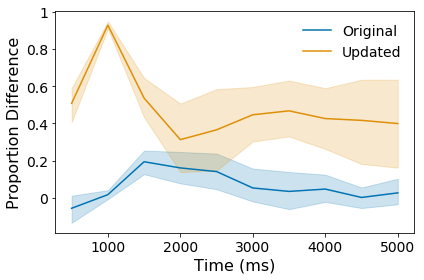

In [35]:
fig, ax = plt.subplots()
sns.lineplot(data=timebin_anova, x='time', y='prop_viewing', hue='variable', palette = 'colorblind')
yticks = np.arange(0,1.2,.2)
ax.set_xticklabels(list(range(0,6000,1000)), fontsize=14)
ax.set_yticklabels([0,0,.2,.4,.6,.8,1], fontsize=14)
ax.set_ylabel('Proportion Difference', fontsize=16)
ax.set_xlabel('Time (ms)', fontsize=16)
plt.legend(title='', fontsize=14)
ax.legend(['Original', 'Updated'], fontsize=14, frameon=False)
plt.tight_layout()
plt.savefig('figs/mismatch_timecourse_minuslure.png')

In [187]:
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

In [188]:
timebin_anova.columns

Index(['sub', 'time', 'variable', 'prop_viewing'], dtype='object')

In [189]:
timebin_anova['prop_viewing_arcsin'] = np.arcsin(timebin_anova['prop_viewing'])

In [190]:
timebin_anova

,sub,time,variable,prop_viewing,prop_viewing_arcsin
0,ec105,500,loc1,-0.133024,-0.133420
1,ec106,500,loc1,-0.009091,-0.009091
2,ec107,500,loc1,-0.020238,-0.020239
3,ec108,500,loc1,-0.173038,-0.173913
4,ec109,500,loc1,0.052317,0.052341
5,ec105,1000,loc1,-0.005000,-0.005000
6,ec106,1000,loc1,-0.017787,-0.017787
7,ec107,1000,loc1,0.059329,0.059364
8,ec108,1000,loc1,0.009505,0.009505
9,ec109,1000,loc1,0.037166,0.037174


In [191]:
x = AnovaRM(timebin_anova, 'prop_viewing', 'sub', within=['time', 'variable'])
tab = AnovaRM.fit(x)
print(tab)

                   Anova
              F Value Num DF  Den DF Pr > F
-------------------------------------------
time           4.6433 9.0000 36.0000 0.0004
variable      24.1027 1.0000  4.0000 0.0080
time:variable 14.6221 9.0000 36.0000 0.0000



In [195]:
for time in timebinmax:
    tmptime = cor[cor['time']==time]
    x = stats.ttest_rel(scipy.special.expit(tmptime['loc1diff']), scipy.special.expit(tmptime['loc2diff']))
    print(time, x)

500 Ttest_relResult(statistic=-67.81688925808034, pvalue=2.8325039330457875e-07)
1000 Ttest_relResult(statistic=-9.206045434124533, pvalue=0.0007734746011535968)
1500 Ttest_relResult(statistic=-1.0957353159485308, pvalue=0.33473934743603767)
2000 Ttest_relResult(statistic=-1.1071278338156032, pvalue=0.33033297188953303)
2500 Ttest_relResult(statistic=-1.8744762080102224, pvalue=0.13413495550131008)
3000 Ttest_relResult(statistic=-5.964386085179599, pvalue=0.003968142858232659)
3500 Ttest_relResult(statistic=-3.9519198223494816, pvalue=0.016790950814775565)
4000 Ttest_relResult(statistic=-4.063785347389317, pvalue=0.015300958494095778)
4500 Ttest_relResult(statistic=-3.9931262461327943, pvalue=0.016222628775048483)
5000 Ttest_relResult(statistic=-2.716617587203407, pvalue=0.05317230474987195)


In [196]:
for time in timebinmax:
    tmptime = cor[cor['time']==time]
    x = stats.ttest_rel(tmptime['loc1diff'], tmptime['loc2diff'])
    print(time, x)

500 Ttest_relResult(statistic=-62.11938946334155, pvalue=4.0224680364309435e-07)
1000 Ttest_relResult(statistic=-8.955069676155135, pvalue=0.0008602152662447923)
1500 Ttest_relResult(statistic=-1.0922311645735248, pvalue=0.3361053589606545)
2000 Ttest_relResult(statistic=-1.1233637403362589, pvalue=0.32414453387486547)
2500 Ttest_relResult(statistic=-1.8697766646627054, pvalue=0.1348659454327027)
3000 Ttest_relResult(statistic=-5.741268402337616, pvalue=0.004560560973568282)
3500 Ttest_relResult(statistic=-3.9275454955656035, pvalue=0.017138386038457628)
4000 Ttest_relResult(statistic=-3.9825160111287046, pvalue=0.01636672667674898)
4500 Ttest_relResult(statistic=-3.8727981904347737, pvalue=0.017950737454076687)
5000 Ttest_relResult(statistic=-2.6544848216614008, pvalue=0.05671566554944552)


In [38]:
for time in timebinmax:
    tmptime = cor[cor['time']==time]
    x = stats.ttest_1samp(tmptime['loc1diff'], 0)
    print(time, x)

500 Ttest_1sampResult(statistic=0.14002800840280083, pvalue=0.8954058044871901)
1000 Ttest_1sampResult(statistic=1.3423527861978974, pvalue=0.2506045249913821)
1500 Ttest_1sampResult(statistic=4.44625245144686, pvalue=0.011279316450039826)
2000 Ttest_1sampResult(statistic=1.6193358198007257, pvalue=0.1806881284293472)
2500 Ttest_1sampResult(statistic=2.1402501008001145, pvalue=0.09905998085389302)
3000 Ttest_1sampResult(statistic=0.996146710501532, pvalue=0.37555846891884603)
3500 Ttest_1sampResult(statistic=0.4093112150935064, pvalue=0.7032803378578885)
4000 Ttest_1sampResult(statistic=0.6876752463051097, pvalue=0.5294576441379776)
4500 Ttest_1sampResult(statistic=0.3370122298950208, pvalue=0.7530485502859983)
5000 Ttest_1sampResult(statistic=0.6193550090347064, pvalue=0.5692166666768146)


In [39]:
for time in timebinmax:
    tmptime = cor[cor['time']==time]
    x = stats.ttest_1samp(tmptime['loc2diff'], 0)
    print(time, x)

500 Ttest_1sampResult(statistic=70.25796394667512, pvalue=2.4591368204822733e-07)
1000 Ttest_1sampResult(statistic=15.916619543150913, pvalue=9.10762066325417e-05)
1500 Ttest_1sampResult(statistic=4.431602063977646, pvalue=0.011407847116613613)
2000 Ttest_1sampResult(statistic=2.3317041519292805, pvalue=0.08010242962589421)
2500 Ttest_1sampResult(statistic=3.039109009454625, pvalue=0.038435763982092704)
3000 Ttest_1sampResult(statistic=4.731288353192961, pvalue=0.009095437739048065)
3500 Ttest_1sampResult(statistic=5.014463492401667, pvalue=0.007414263415958438)
4000 Ttest_1sampResult(statistic=3.5513196229894417, pvalue=0.023770406135336992)
4500 Ttest_1sampResult(statistic=3.1769505184095705, pvalue=0.03363319529818005)
5000 Ttest_1sampResult(statistic=2.375715100364025, pvalue=0.07634437456192197)
